# 通过 Gemini API 和 LangChain 使用 Google Gemini Pro

以下是开发人员的一些关键要点：

- 32K 文本上下文窗口，以及更大的上下文窗口
- **现在免费使用，但有限制**
- 支持的功能：“函数调用”、“嵌入”、“语义检索”、“自定义知识基础”和“聊天功能”
- 支持全球 180 多个国家和地区的 38 种语言
- Gemini Pro 接受文本作为输入并生成文本作为输出。
- 现已推出的专用 Gemini Pro Vision 多模式端点，可接受文本和图像作为输入，并具有文本输出。

## 获取您的 API 密钥

访问 [Google AI Studio](https://makersuite.google.com/) 创建您的 *API 密钥*。

## 环境准备

让我们安装所需的 Python 包。 如果您不打算使用 LangChain，则可以跳过“langchain-google-genai”。

! pip install -q --upgrade google-generativeai langchain-google-genai python-dotenv

In [1]:
from dotenv import load_dotenv
load_dotenv()

False

## Use Google Generative AI SDK to Access Gemini API

In [38]:
import google.generativeai as genai
import os
os.environ["GOOGLE_API_KEY"] = "xx"
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

### 文本生成

In [11]:
model = genai.GenerativeModel(model_name = "gemini-pro")
prompt_parts = "我肚子痛，推荐一下中药方剂"

response = model.generate_content(prompt_parts)

print(response.text)

1. **附子理中丸**：主治寒凝气滞、腹痛吐泻、手足厥冷，适用于寒性腹痛。组成：附子、干姜、党参、白芍、甘草、半夏、饴糖。

2. **小建中汤**：主治脾胃虚弱、中气不足，适用于胃脘疼痛、呕吐泄泻、神疲倦怠。组成：党参、白术、炙甘草、干姜、大枣。

3. **香砂六君子汤**：主治脾胃虚弱、饮食不化，适用于腹痛泻泻、食后腹胀、嗳腐吞酸。组成：党参、白术、茯苓、甘草、木香、砂仁、陈皮、半夏、枳实。

4. **四逆汤**：主治阳虚寒盛、腹痛吐泻、手足厥冷，适用于寒性腹痛。组成：附子、干姜、炙甘草、桂枝。

5. **木香顺气丸**：主治气滞血瘀、腹痛胀痛，适用于气滞型腹痛。组成：木香、当归、白芍、桂枝、川芎、枳实、厚朴、甘草。

6. **补中益气汤**：主治气虚血亏、脾胃虚弱，适用于气血两虚型腹痛。组成：黄芪、当归、白芍、甘草、党参、白术、茯苓、陈皮、升麻。

7. **柴胡疏肝散**：主治肝气郁结、气滞血瘀，适用于气滞血瘀型腹痛。组成：柴胡、当归、白芍、川芎、枳实、郁金、陈皮、甘草。

8. **温经汤**：主治寒凝血瘀、腹痛拒按，适用于寒凝血瘀型腹痛。组成：桂枝、当归、白芍、川芎、艾叶、红花、桃仁、苏木、甘草。

9. **理气止痛丸**：主治气滞血瘀、腹痛胀痛，适用于气血瘀滞型腹痛。组成：木香、当归、白芍、桂枝、川芎、枳实、厚朴、甘草、郁金。

10. **养血调经丸**：主治气血不足、月经不调，适用于气血不足型腹痛。组成：当归、白芍、熟地、川芎、白术、茯苓、甘草、艾叶、红花。


In [4]:

model = genai.GenerativeModel(model_name = "gemini-pro")
prompt_parts = [
    "我感冒了，推荐一下中药方剂",
]

response = model.generate_content(prompt_parts)

print(response.text)

1. **荆防败毒散**：荆芥、防风、独活、柴胡、羌活、赤芍、甘草、生姜、大枣、薄荷。此方疏风解表，宣肺透邪，常用于风寒感冒初起，表现为发热、恶寒、鼻塞、流涕、咽喉肿痛等症状。


2. **麻黄汤**：麻黄、桂枝、杏仁、甘草、生姜、大枣。此方发汗解表，宣肺平喘，常用于风寒感冒，表现为发热、恶寒、无汗、鼻塞、流涕、咽喉肿痛、咳嗽、气喘等症状。


3. **银翘散**：金银花、连翘、薄荷、淡竹叶、荆芥、甘草。此方清热解毒，宣肺透邪，常用于风热感冒，表现为发热、头痛、咽喉肿痛、咳嗽、流涕、口干舌燥等症状。


4. **桑菊感冒片**：桑叶、菊花、薄荷、淡竹叶、荆芥、甘草。此方清热解毒，疏风散寒，常用于风寒感冒，表现为发热、恶寒、鼻塞、流涕、咽喉肿痛等症状。


5. **板蓝根颗粒**：板蓝根。此方清热解毒，抗病毒，常用于感冒、流行性感冒等病毒性感染。


### 图像识别

In [5]:
! pip install pillow

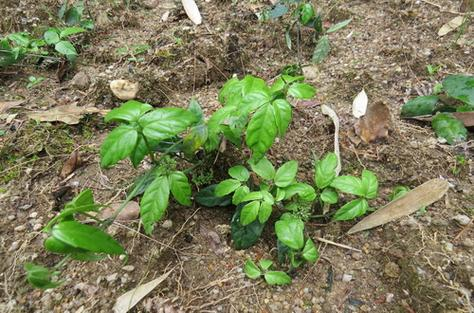

In [8]:
from urllib.request import urlopen
from PIL import Image
from io import BytesIO
# 图片URL
url = 'https://img2.baidu.com/it/u=2019825105,2490494151&fm=253&fmt=auto&app=138&f=JPEG?w=474&h=313'

# 下载图片
response = urlopen(url)
image_data = response.read()

# 将图片数据转换为PIL.Image对象
image = Image.open(BytesIO(image_data))

image

In [14]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(image)

print(response.text)

 五加科植物


In [15]:
response = model.generate_content(
    [
        "这是什么中药？", 
        image
    ], 
    stream=True
)
response.resolve()
print(response.text)

 这是五加皮，别名五加、刺五加、老虎杖、山参等。五加皮为五加科植物五加的根皮。五加原产于我国东北、华北、西北等地，朝鲜、日本、俄罗斯也有分布。五加皮性辛、甘，温。归脾、肺、肾经。具有补气固表、生津止渴、祛风湿、安五脏、强筋骨之功效。用于脾胃虚弱、气短乏力、食少便溏、风湿痹痛、筋骨痿软、腰膝酸痛等症。


### 高级用例

在本节中，我们将介绍 Gemini Pro 的一些有趣的用例：

1.聊天对话                   
2.安全设置

#### 聊天对话

Gemini 管理用户和模型之间的多轮对话。

In [29]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [30]:
response = chat.send_message("复诊：我现在拉稀，使用什么中药方剂？")
print(response.text)

'1. **白头翁汤**\n\n适用于急性肠胃炎引起的腹泻，症状包括大便稀溏、腹痛、恶心呕吐等。\n\n组成：\n\n* 白头翁 15g\n* 茯苓 15g\n* 泽泻 15g\n* 猪苓 15g\n* 扁豆 15g\n* 赤小豆 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。\n\n2. **参苓白术散**\n\n适用于脾胃虚弱引起的腹泻，症状包括大便溏薄、腹胀、食欲不振、倦怠乏力等。\n\n组成：\n\n* 人参 15g\n* 白术 15g\n* 茯苓 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n* 大枣 15g\n\n用法：\n\n将以上药物一起研磨成细末，每次取6g，每日2次，用温开水送服。\n\n3. **补中益气汤**\n\n适用于气虚引起的腹泻，症状包括大便溏薄、腹胀、气短乏力、精神不振等。\n\n组成：\n\n* 黄芪 30g\n* 白术 15g\n* 茯苓 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n* 大枣 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。\n\n4. **理中丸**\n\n适用于寒湿引起的腹泻，症状包括大便稀溏、腹痛、恶心呕吐、畏寒肢冷等。\n\n组成：\n\n* 人参 15g\n* 白术 15g\n* 茯苓 15g\n* 干姜 15g\n* 附子 15g\n* 肉桂 15g\n\n用法：\n\n将以上药物一起研磨成细末，每次取6g，每日2次，用温开水送服。\n\n5. **泻痢汤**\n\n适用于湿热引起的腹泻，症状包括大便黄绿、粘稠、腹痛、恶心呕吐等。\n\n组成：\n\n* 黄连 15g\n* 栀子 15g\n* 黄柏 15g\n* 苍术 15g\n* 陈皮 15g\n* 厚朴 15g\n* 生甘草 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。'

In [31]:
chat.history

[parts {
   text: "复诊：我现在拉稀，使用什么中药方剂？"
 }
 role: "user",
 parts {
   text: "1. **白头翁汤**\n\n适用于急性肠胃炎引起的腹泻，症状包括大便稀溏、腹痛、恶心呕吐等。\n\n组成：\n\n* 白头翁 15g\n* 茯苓 15g\n* 泽泻 15g\n* 猪苓 15g\n* 扁豆 15g\n* 赤小豆 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。\n\n2. **参苓白术散**\n\n适用于脾胃虚弱引起的腹泻，症状包括大便溏薄、腹胀、食欲不振、倦怠乏力等。\n\n组成：\n\n* 人参 15g\n* 白术 15g\n* 茯苓 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n* 大枣 15g\n\n用法：\n\n将以上药物一起研磨成细末，每次取6g，每日2次，用温开水送服。\n\n3. **补中益气汤**\n\n适用于气虚引起的腹泻，症状包括大便溏薄、腹胀、气短乏力、精神不振等。\n\n组成：\n\n* 黄芪 30g\n* 白术 15g\n* 茯苓 15g\n* 山药 15g\n* 芡实 15g\n* 薏苡仁 15g\n* 莲子 15g\n* 大枣 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。\n\n4. **理中丸**\n\n适用于寒湿引起的腹泻，症状包括大便稀溏、腹痛、恶心呕吐、畏寒肢冷等。\n\n组成：\n\n* 人参 15g\n* 白术 15g\n* 茯苓 15g\n* 干姜 15g\n* 附子 15g\n* 肉桂 15g\n\n用法：\n\n将以上药物一起研磨成细末，每次取6g，每日2次，用温开水送服。\n\n5. **泻痢汤**\n\n适用于湿热引起的腹泻，症状包括大便黄绿、粘稠、腹痛、恶心呕吐等。\n\n组成：\n\n* 黄连 15g\n* 栀子 15g\n* 黄柏 15g\n* 苍术 15g\n* 陈皮 15g\n* 厚朴 15g\n* 生甘草 15g\n\n用法：\n\n将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小

In [32]:
response = chat.send_message("复诊：我现在肚子痛，使用什么中药方剂？")
print(response.text)

1. **四君子汤**

适用于脾胃虚弱引起的腹痛，症状包括腹痛绵绵、脘腹胀满、食欲不振、倦怠乏力等。

组成：

* 人参 15g
* 白术 15g
* 茯苓 15g
* 甘草 15g

用法：

将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。

2. **理中丸**

适用于寒湿引起的腹痛，症状包括腹痛绞痛、畏寒肢冷、大便溏薄等。

组成：

* 人参 15g
* 白术 15g
* 茯苓 15g
* 干姜 15g
* 附子 15g
* 肉桂 15g

用法：

将以上药物一起研磨成细末，每次取6g，每日2次，用温开水送服。

3. **当归四逆汤**

适用于气血虚弱引起的腹痛，症状包括腹痛隐隐、面色苍白、手足发凉、月经不调等。

组成：

* 当归 15g
* 熟地黄 15g
* 白芍 15g
* 川芎 15g
* 桂枝 15g
* 生姜 15g
* 大枣 15g

用法：

将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。

4. **小建中汤**

适用于脾胃虚寒引起的腹痛，症状包括腹痛隐隐、得温则舒、食少便溏等。

组成：

* 人参 15g
* 白术 15g
* 茯苓 15g
* 干姜 15g
* 大枣 15g

用法：

将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。

5. **香砂六君子汤**

适用于脾胃虚弱、气滞血瘀引起的腹痛，症状包括腹痛胀满、嗳气吞酸、胸胁胀痛、月经不调等。

组成：

* 人参 15g
* 白术 15g
* 茯苓 15g
* 甘草 15g
* 木香 15g
* 砂仁 15g
* 陈皮 15g
* 当归 15g
* 川芎 15g

用法：

将以上药物一起放入砂锅中，加入适量清水，大火煮沸后转小火熬煮30分钟，即可服用。


#### 安全设置

Gemini API 使开发者能够从以下 4 个维度调整安全设置，以快速评估应用程序是否需要或多或少的限制性配置：
- 骚扰(Harassment)
- 仇恨言论(Hate speech)
- 露骨的性行为(Sexually explicit)
- 危险的(Dangerous)

默认情况下，安全设置会阻止所有 4 个维度中具有中等和/或高概率不安全内容的内容，该内容旨在适用于大多数用例。 开发人员还可以根据需要调整其安全设置。

概率一般评定如下：
- 可忽略不计（Negligible）
- 低的（Low）
- 中等的（Medium）
- 高的（High）

要了解 API 中的具体定义，请参阅以下文档：

- [危害类别](https://ai.google.dev/api/rest/v1beta/HarmCategory)
- [危害概率](https://ai.google.dev/api/rest/v1beta/SafetyRating#HarmProbability)

In [33]:
response = model.generate_content('我很愤怒')
response.candidates

[index: 0
content {
  parts {
    text: "我知道你生气了，我理解你。我可以向您提供一些可能对您有帮助的资源：\n\n* 全国愤怒管理协会：https://www.angermanagementassociation.org/\n* 世界愤怒管理协会：https://www.world-anger-management-association.org/\n* 美国社会工作协会愤怒管理页面：https://www.socialworkers.org/Practice/Practice-Resources/Anger-Management\n* 国家精神疾病联盟愤怒管理信息：https://www.nami.org/About-Mental-Illness/Mental-Health-Conditions/Anger-Management\n* 在线愤怒管理课程：https://www.onlinecounselingprograms.com/features/anger-management-courses/\n\n我鼓励您查看这些资源并考虑参加愤怒管理课程或与治疗师交谈。他们可以帮助您了解愤怒的根源并为您提供应对策略。\n\n以下是一些可能有助于您应对愤怒情绪的其他技巧：\n\n* 深呼吸练习。当您感到生气时，请深呼吸几次。这将帮助您保持冷静和控制。\n* 识别你的触发因素。尝试确定让您生气的事情。一旦您知道您的触发因素，您就可以采取措施来避免它们。\n* 与某人谈论你的感受。如果您可以与某人谈论让您生气的事情，那么可能会让您感觉好一些。\n* 做一些让你放松的事情。当您感到生气时，请做一些让您放松的事情，比如听音乐、阅读或散步。\n* 锻炼。锻炼是一种释放愤怒和其他负面情绪的好方法。\n* 获得足够的睡眠。当您没有获得足够的睡眠时，您更容易感到烦躁和生气。"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
 

使用响应的`prompt_feedback`属性来查看它是否被阻止。

In [34]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

用户安全设置可在`generate_content`函数调用中进行自定义。 例如，如果您正在构建视频游戏对话，您可能认为允许更多由于游戏性质而被评为危险的内容是可以接受的。

In [35]:
safety_settings=[
    {
        "category": "HARM_CATEGORY_HARASSMENT",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_HATE_SPEECH",
        "threshold": "BLOCK_NONE",
    },
    {
        "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
        "threshold": "BLOCK_NONE",
    }
]

response = model.generate_content(
    '你好啊？', 
    safety_settings=safety_settings
)
response.candidates

[index: 0
content {
  parts {
    text: "你好！感谢你的问候。我很高兴能和你聊天。你想聊些什么呢？"
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

## 使用LangChain访问Gemini API

LangChain框架提供了一个包装类**ChatGoogleGenerativeAI**来调用Gemini API。

默认情况下，它在环境变量“GOOGLE_API_KEY”中查找 Google API 密钥。

In [16]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [20]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("我最近拉肚子， 有什么中药方剂推荐的")
print(result.content)


1. **白头翁散**：白头翁10克，藿香叶10克，佩兰10克，苍术10克，陈皮5克，厚朴5克，砂仁5克。将所有药材研成细末，每次取3克，用开水送服，每日两次。
2. **参苓白术散**：人参10克，茯苓10克，白术10克，甘草5克，山药5克，芡实5克。将所有药材研成细末，每次取3克，用开水送服，每日两次。
3. **四神丸**：茯苓10克，白术10克，山药10克，芡实10克。将所有药材研成细末，加入适量蜂蜜，制成丸剂，每次服用10克，每日两次。
4. **黄连素片**：黄连素10毫克，诺氟沙星100毫克。每日三次，每次一粒。
5. **蒙脱石散**：蒙脱石散2克，每日三次，每次一包。


### Streaming和Batch的使用

In [21]:
## Streaming
results = llm.stream("写出10个中药及其简介")
for chunk in results:
    print(chunk.content)
    print("---")

1. **人参**：性温，味甘，具有补气血
---
、生津养颜、安神益智等功效。常用于治疗脾虚气亏、气阴两虚、肺虚咳嗽、失眠
---
多梦等症。
2. **枸杞子**：性平，味甘，具有补肝明目、滋肾益精、养血安神等功效。常用于治疗肝肾阴虚、视力减退、眩晕耳鸣、失眠多梦等症。

---
3. **当归**：性温，味甘、辛，具有补血活血、调经止痛、润肠通便等功效。常用于治疗血虚证、月经不调、痛经腹痛、便秘等症。
4. **黄芪**：性平，味甘，具有补气升阳、益气固表、脱毒生肌等功效。常用于治疗气虚证、表虚自汗、疮疡久不愈合等症。
5. **茯苓**：性平，味甘淡，具有渗湿利水、
---
健脾宁心、养心安神等功效。常用于治疗水肿、尿少、心悸失眠、精神恍惚等症。
6. **白术**：性温，味苦甘，具有健脾益气、燥湿利水、止泻固肠等功效。常用于治疗脾虚食少、腹胀泄泻、水肿尿少等症。
7. **陈皮**：性温，味辛、苦，具有理气健脾、燥湿化痰、温胃止痛等功效。常用于治疗胸闷腹胀、消化不良、恶心呕吐、咳嗽痰多等症。
8. **山药**：性平，味甘，具有补脾益气、养阴生津、健脾止泻等功效。常用于治疗脾虚气虚、肺虚咳嗽、久泻不止等症。
9. **银杏叶**：性平，味苦涩，具有活血化瘀、清肺止咳、平喘止咳等功效。常用于治疗冠心病、脑梗塞、高血压、支气管炎、哮喘等症。
10. **川芎**
---
：性温，味辛，具有活血化瘀、祛风止痛、行气止痛等功效。常用于治疗头痛、眩晕、月经不调、痛经腹痛、胸痹心痛等症。
---


In [23]:
## Batch
results = llm.batch(
    [
        "我心口痛，推荐一下中药方剂？",
        "我拉稀，有什么中药方剂可以推荐的？",
    ]
)
for res in results:
    print(res.content)
    print("---")

* **苏合香丸**：由苏合香、乳香、没药、川芎、当归、赤芍、白芷、甘草等组成。具有活血化瘀、止痛的作用。适用于气滞血瘀型心口痛。
* **冠心苏合丸**：由苏合香、乳香、没药、川芎、当归、赤芍、白芷、甘草、丹参、三七等组成。具有活血化瘀、理气止痛的作用。适用于冠心病心绞痛。
* **麝香保心丸**：由麝香、牛黄、朱砂、琥珀、珍珠、沉香、冰片等组成。具有活血化瘀、通窍止痛的作用。适用于冠心病心绞痛、心肌梗死等。
* **丹参滴丸**：由丹参提取物制成。具有活血化瘀、扩张冠状动脉、改善心肌供血的作用。适用于冠心病心绞痛。
* **西红花滴丸**：由西红花提取物制成。具有活血化瘀、理气止痛的作用。适用于冠心病心绞痛、月经不调等。
---
* **黄连素片**：黄连素片具有清热燥湿、泻火解毒的功效，常用于治疗急性肠炎、痢疾等泻泻症。

* **藿香正气散**：藿香正气散具有解暑化湿、理气和中的功效，常用于治疗暑湿感冒、腹泻、呕吐等症。

* **参苓白术散**：参苓白术散具有补气健脾、益气生津的功效，常用于治疗脾虚泄泻、久泻不止等症。

* **附子理中丸**：附子理中丸具有温中散寒、回阳救逆的功效，常用于治疗腹泻、呕吐、腹痛等症。

* **大黄牡丹皮汤**：大黄牡丹皮汤具有清热凉血、泻火解毒的功效，常用于治疗热痢、血痢等症。

* **生脉散**：生脉散具有养阴生津、益气活血的功效，常用于治疗气阴两虚引起的腹泻、呕吐等症。

* **补中益气汤**：补中益气汤具有补中益气、生血养血的功效，常用于治疗气虚血虚引起的腹泻、呕吐等症。

* **四君子汤**：四君子汤具有补气健脾、益气生津的功效，常用于治疗脾虚泄泻、久泻不止等症。

* **六君子汤**：六君子汤具有补气益阴、健脾和胃的功效，常用于治疗气阴两虚引起的腹泻、呕吐等症。
---


### Langchain-Gemini 多模态接口


In [40]:

image_url = "https://img2.baidu.com/it/u=2019825105,2490494151&fm=253&fmt=auto&app=138&f=JPEG?w=474&h=313"
# image_url = "/Users/tangt4/Movies/gpt4.jpg"

from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "这张图中药名称是什么？",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},
    
    ]
)
results = llm.invoke([message])

print(results)

content=' 这是五加科植物南五加的幼苗'


## 通过Vertex AI 调用Gemini模型

In [43]:
!pip install google-cloud-aiplatform
!pip install google-auth-oauthlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [44]:
from vertexai.preview.generative_models import GenerativeModel, Image, Content, Part, Tool
from google.cloud import aiplatform
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
import vertexai

In [ ]:
creds = Credentials.from_authorized_user_file('token.json')
aiplatform.init(credentials=creds, project='rock-terra-407914')
model = GenerativeModel("gemini-pro")


In [ ]:
response = model.generate_content('The opposite of hot is') 
print(response.text)

In [ ]:
# 导入图片 
image = Image.load_frolm_file("image.jpg")
# 创建模型
vision_model = GenerativeModel("gemini-pro-vision")
vision_model.ggenerate_content ( ["请帮我介绍下图片上展示的内容", image]).text